# Telecom  Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

# Problem statement 
Domain Topic Telecom Churn Analysis Telecom Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. Most telecom companies suffer from voluntary churn.

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can priorities focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

I will examine customer data from  Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Exploratory Data Analysis

1. Import necessary libraries 

2. Import file -- excel file, csv file (data set)

3. To check the dataframe -- Number of features - rows and columns
    --- df.head() -- To check top 5 rows
    --- df.tail() -- To check the bottom 5 rows
    ----Check duplicates-- if there are any duplicates drop them

4. Check the shape of the dataframe -- df.shape -->No of rows and No of columns are there in a dataset

5. To check the info of the dataset --> df.info() -- > How many non-null values are present-- type of data

6. To check the null values -- df.isna().sum() 

7. If there are null values in the dataset -- treat them -- 
    -- 1. continuous variable --  mean
    ---2. categorical variable --  mode
    
8. The statistical information of the data set -- df.describe()

9. Data Visualization --> finding the insights from the data graphically

      PLOTS
    
    a) pairplot 
    
    b) scatter plots
    
    c) Kdeplot
    
    d) Heatmaps         


In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

Load the data file 

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

Look at the top 5 records of data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

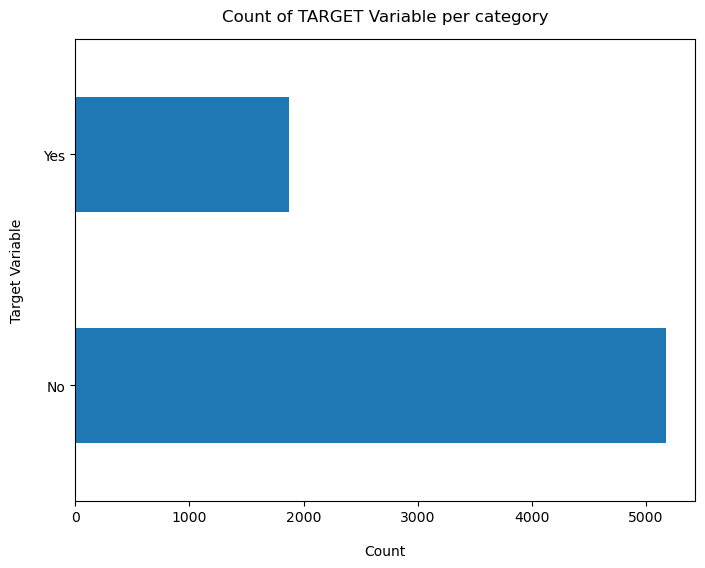

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Data - Initial Intuition

* Here, we don't have any missing data.



## Data Cleaning


 Create a copy of base data for manupulation & processing

In [12]:
df1 = df.copy()

Total Charges should be numeric amount. Let's convert it to numerical data type

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [14]:
df1.loc[df1 ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


 Missing Value Treatement

In [15]:
#Removing missing values 
df1.dropna(how = 'any', inplace = True)

#df1.fillna(0)

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [16]:
# Get the max tenure
print(df1['tenure'].max()) 

72


In [17]:
# Group the tenure in 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df1['tenure_group'] = pd.cut(df1.tenure, range(1, 80, 12), right=False, labels=labels)

In [18]:
df1['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

 Remove columns not required for processing

In [19]:
#drop column customerID and tenure
df1.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
 Plot distibution of individual predictors by churn

### Univariate Analysis

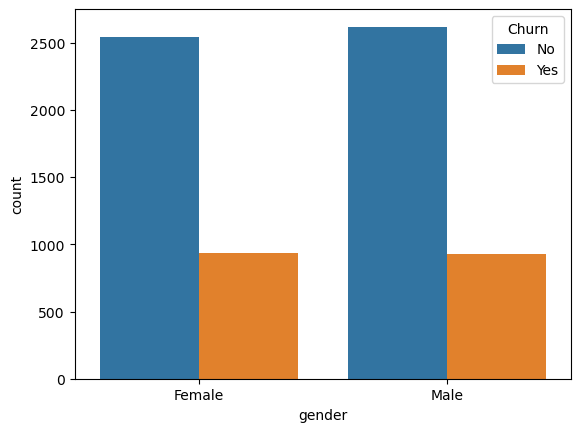

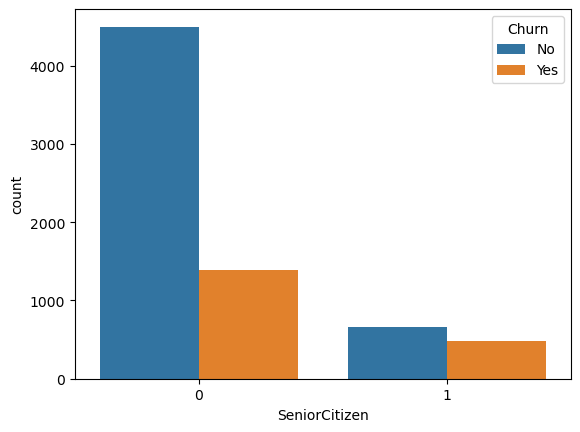

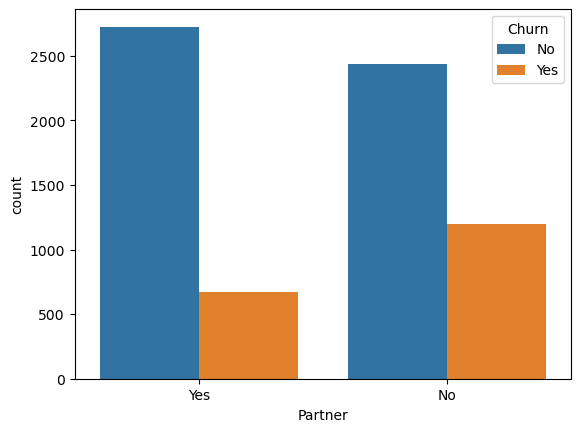

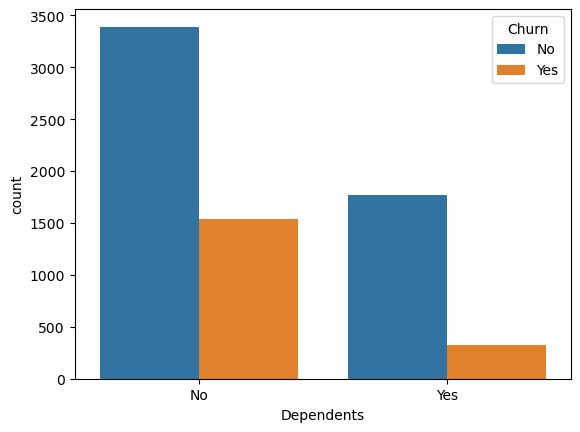

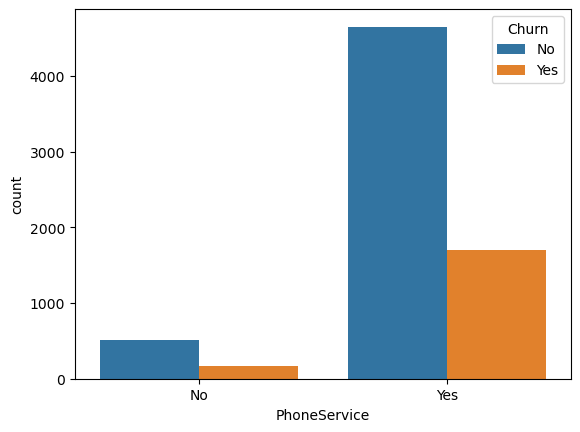

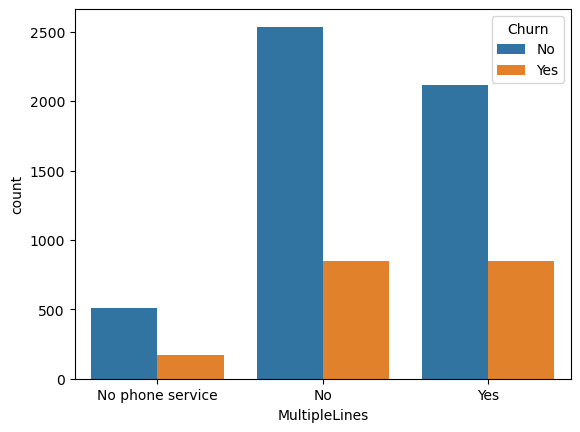

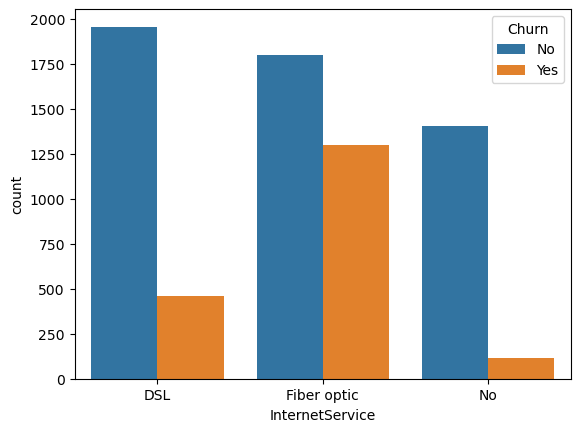

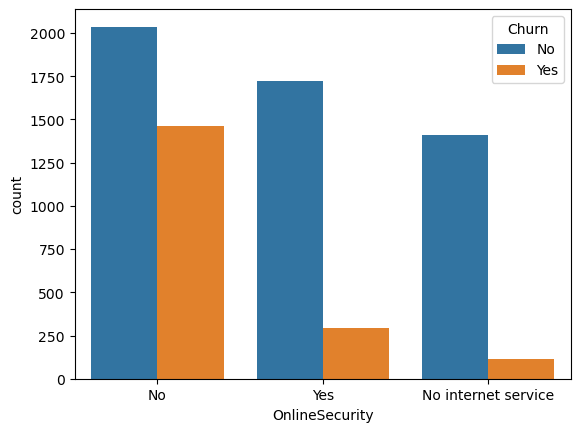

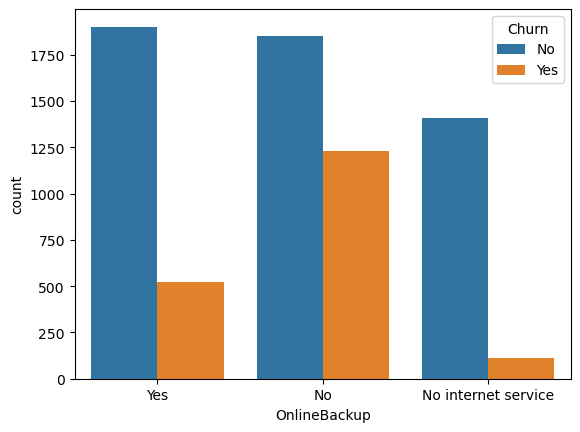

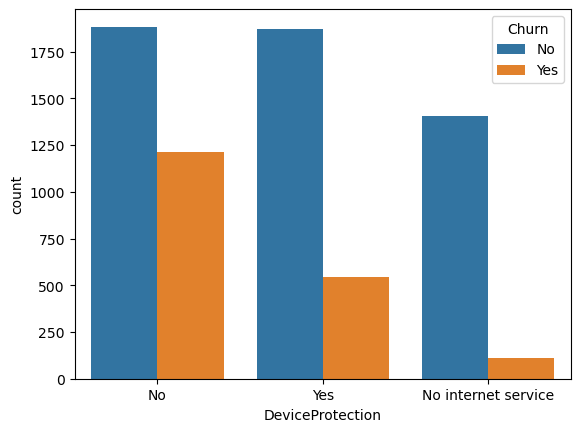

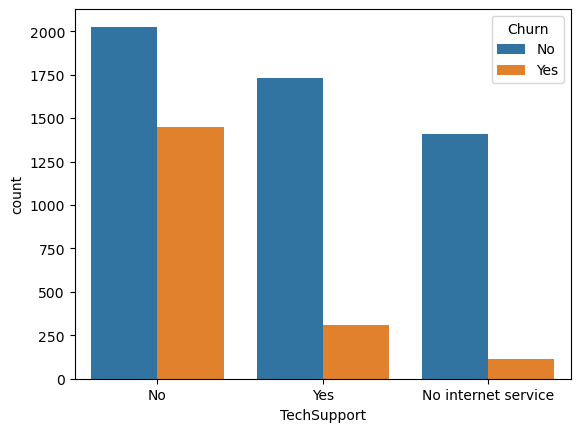

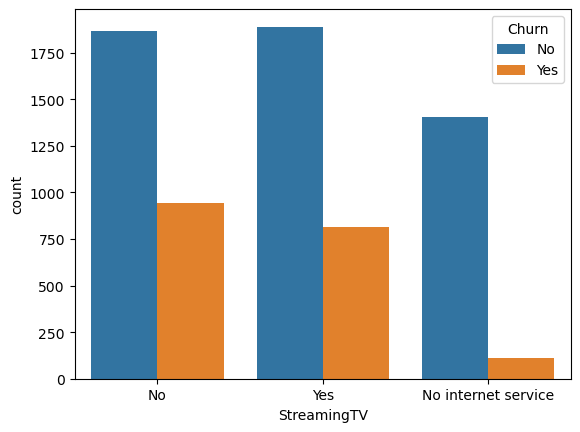

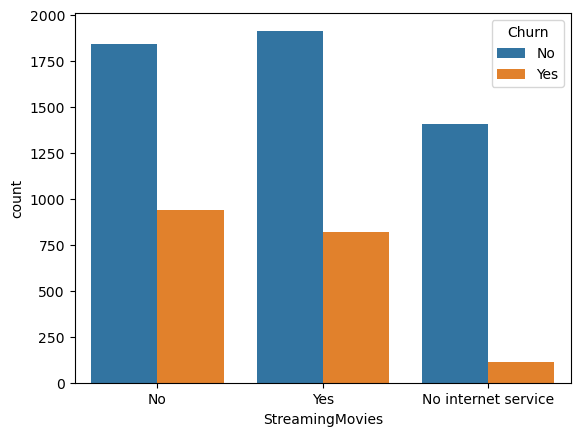

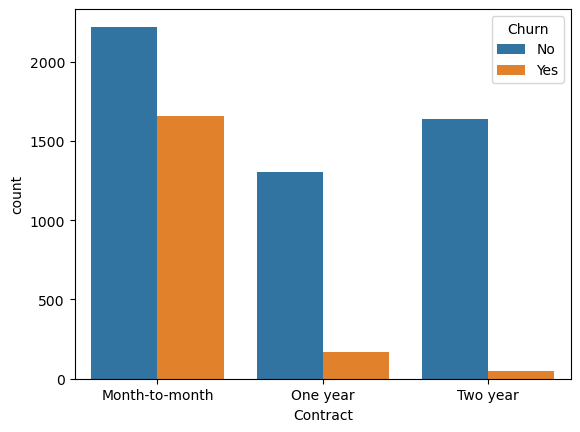

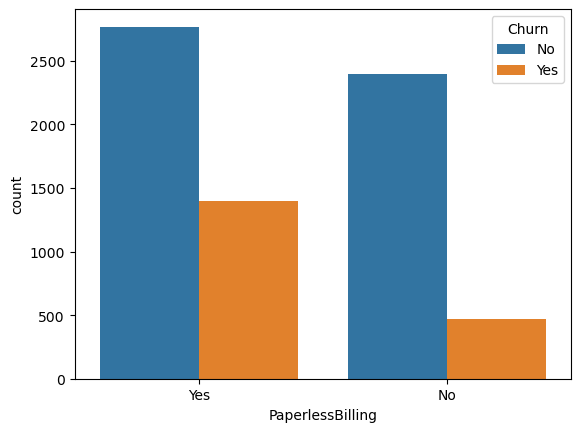

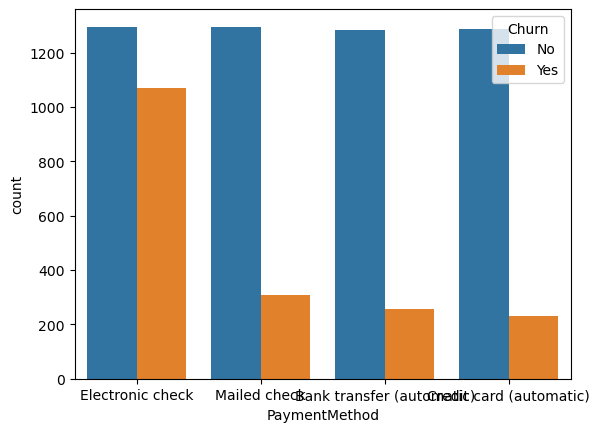

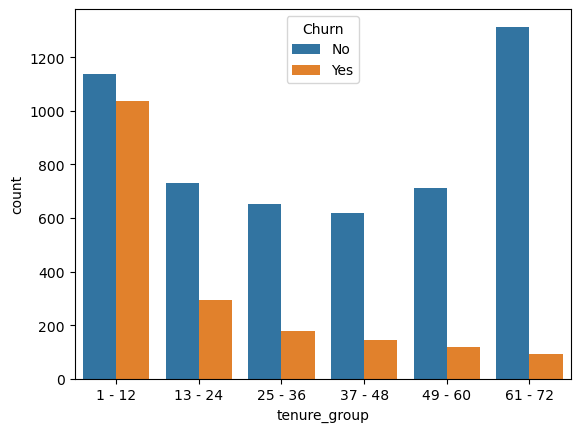

In [20]:
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn')

*Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [21]:
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

In [22]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


 Convert all the categorical variables into dummy variables

In [23]:
df1_dummies = pd.get_dummies(df1)
df1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


 Relationship between Monthly Charges and Total Charges

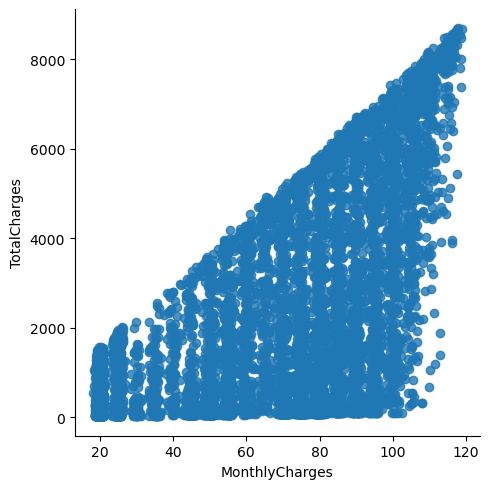

In [24]:
sns.lmplot(data=df1_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

 Churn by Monthly Charges and Total Charges

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_2520\2346162607.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 0) ],
C:\Users\Rutuja\AppData\Local\Temp\ipykernel_2520\2346162607.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

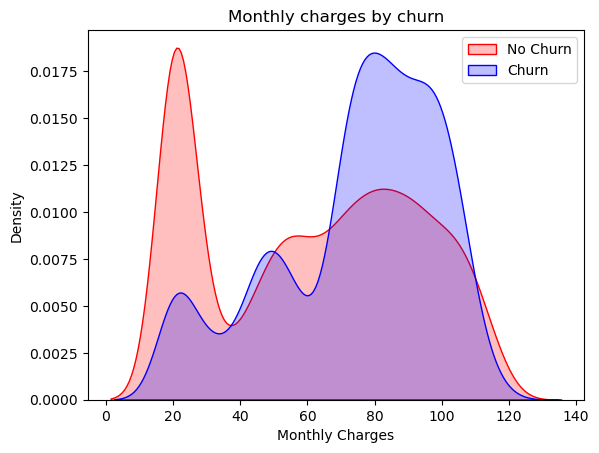

In [25]:
Mth = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Churn is high when Monthly Charges ar high

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_2520\2339490505.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 0) ],
C:\Users\Rutuja\AppData\Local\Temp\ipykernel_2520\2339490505.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

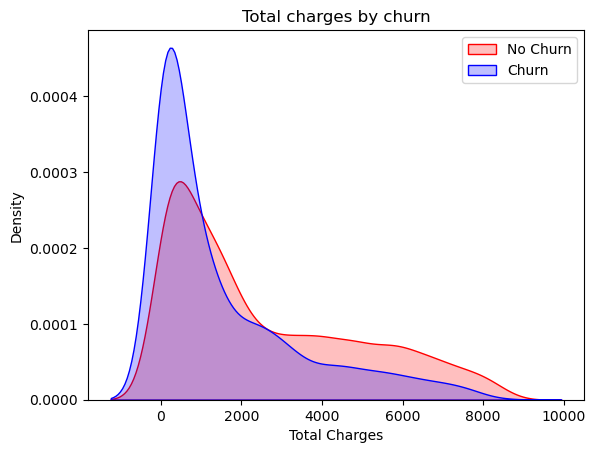

In [26]:
Tot = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

 as higher Churn at lower Total Charges

 Higher Monthly Charge,  Lower tenure and Lower Total Charge are linkd to High Churn.

**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

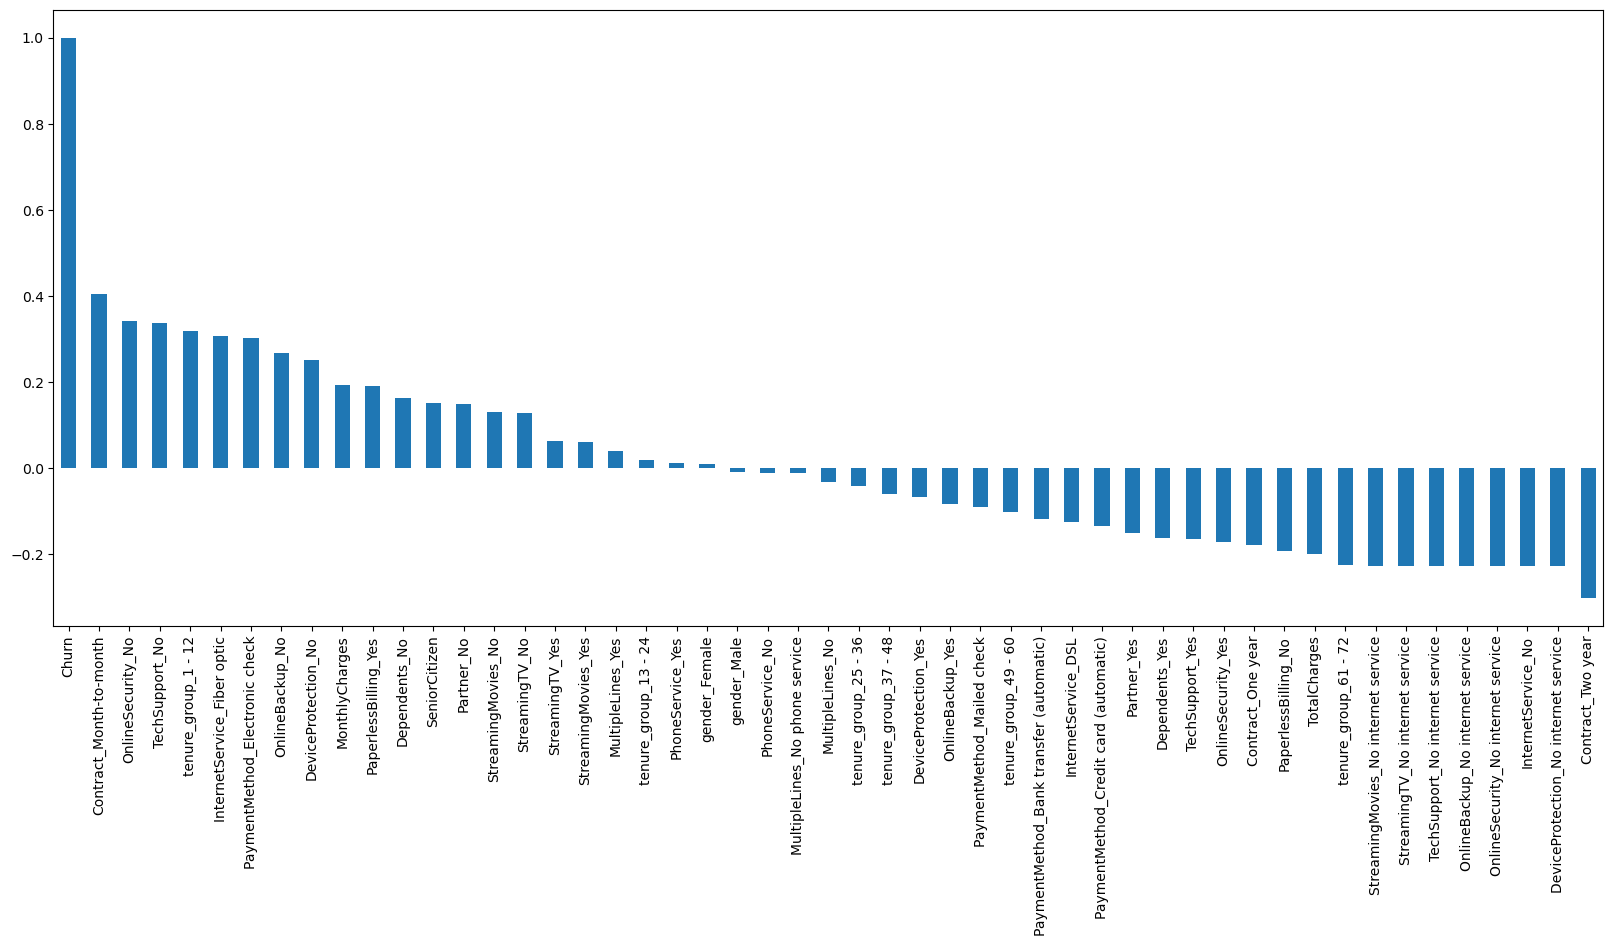

In [27]:
plt.figure(figsize=(20,8))
df1_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')



**HIGH** Churn - Month to month contracts, No online security, No Tech support,First year of subscription and Fibre Optics Internet

**LOW** Churn -Long term contracts**,Subscriptions without internet service and The customers engaged for 5+ years

Features like Gender, Availability of PhoneService and multiple lines have alomost **NO** impact on Churn



<Axes: >

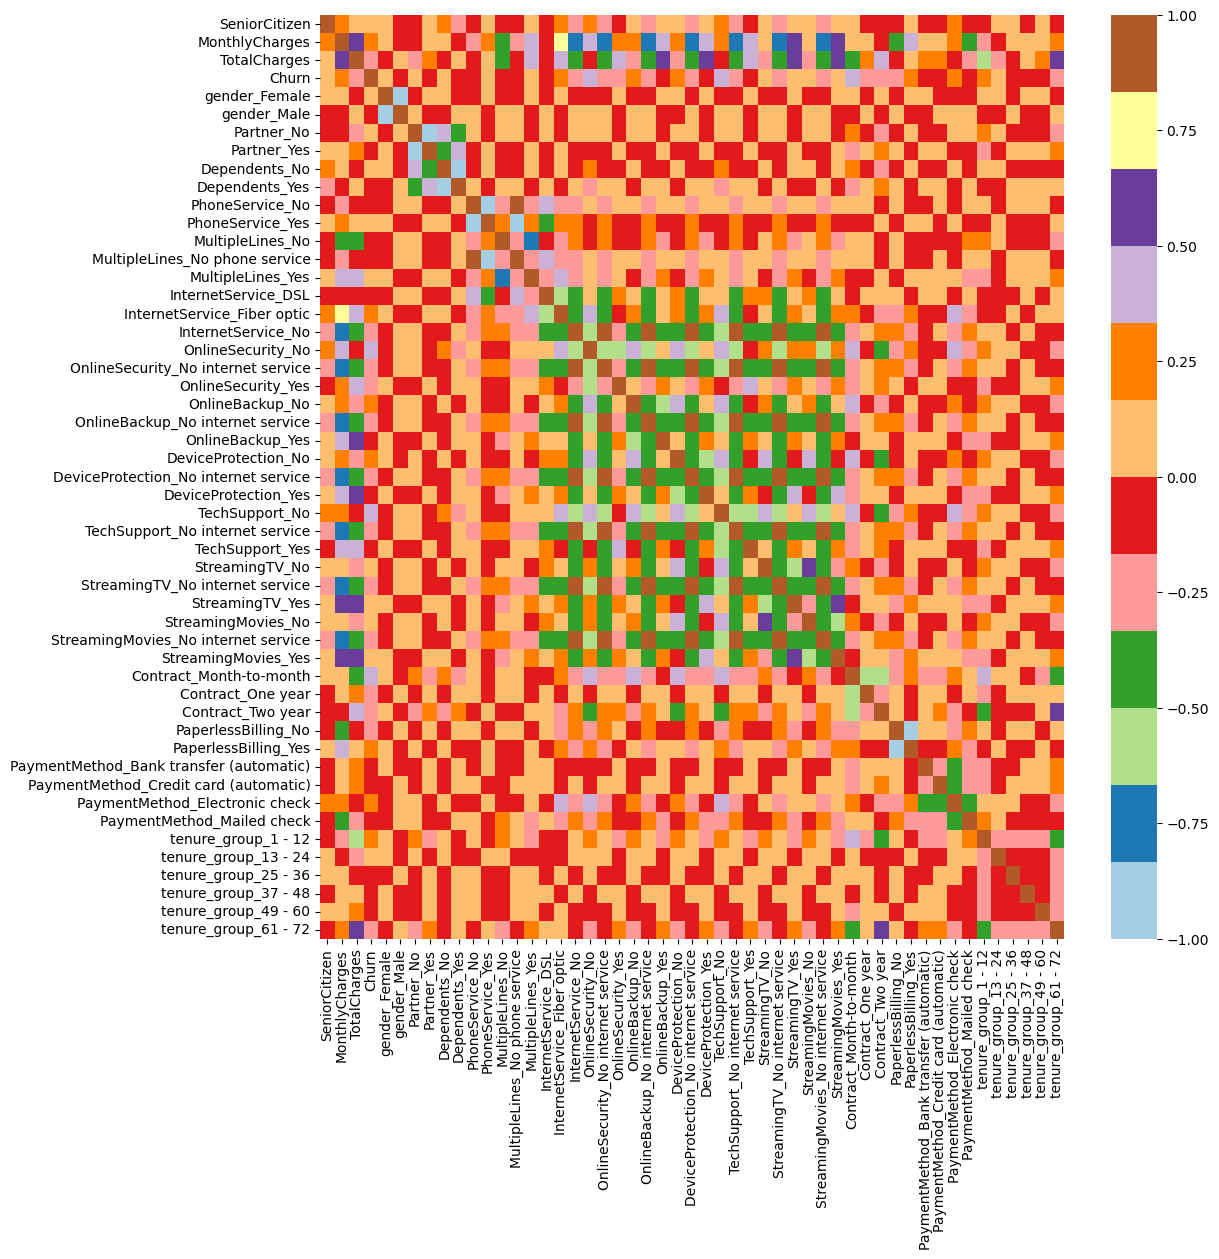

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [29]:
new_df1_target0=df1.loc[df1["Churn"]==0]
new_df1_target1=df1.loc[df1["Churn"]==1]

In [30]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 25
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

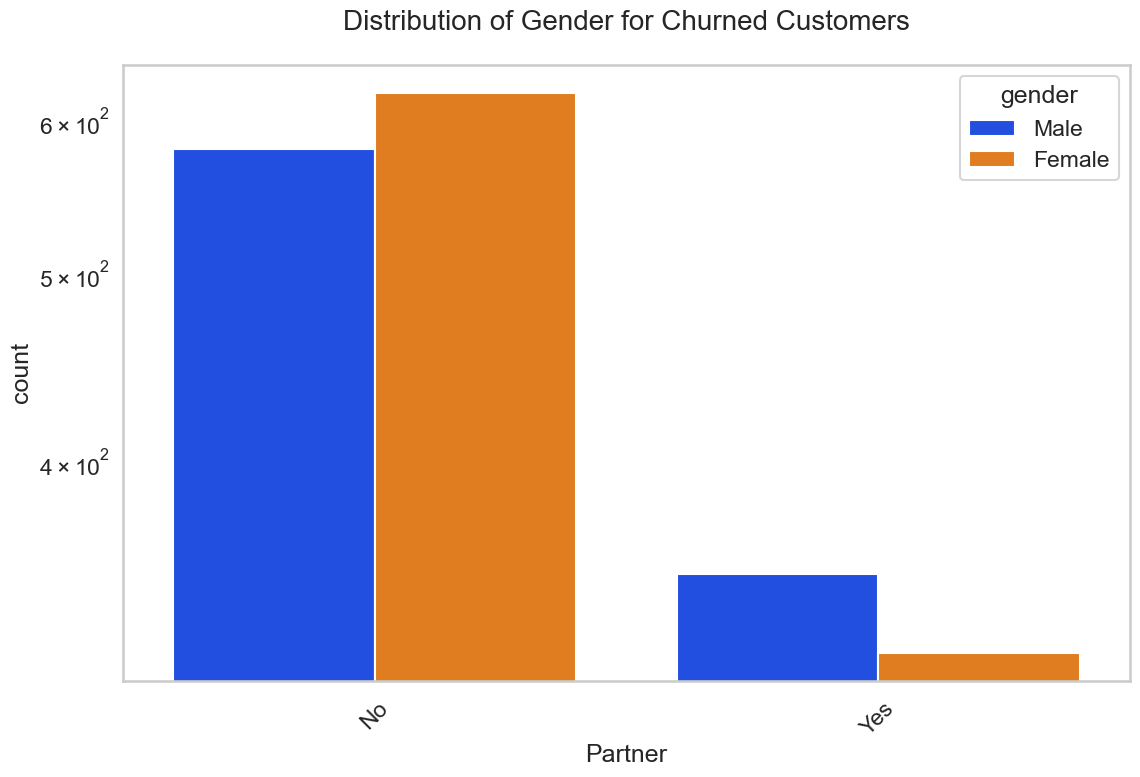

In [31]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

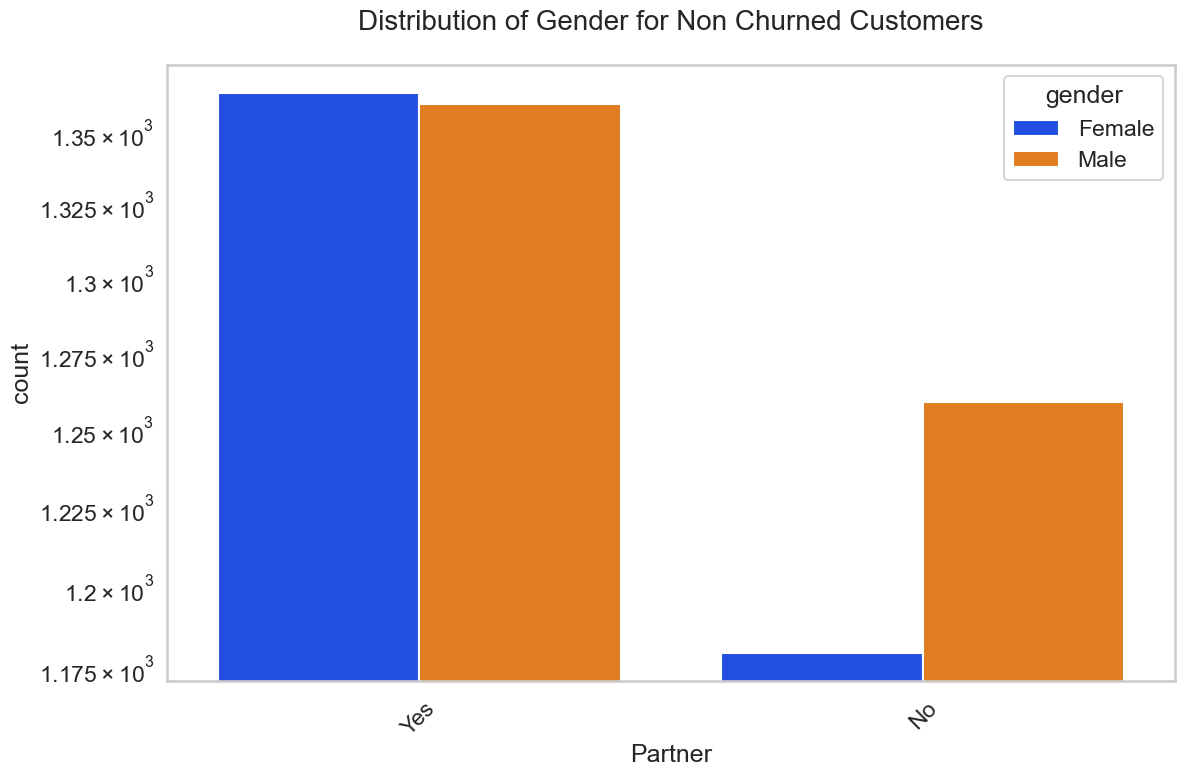

In [32]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

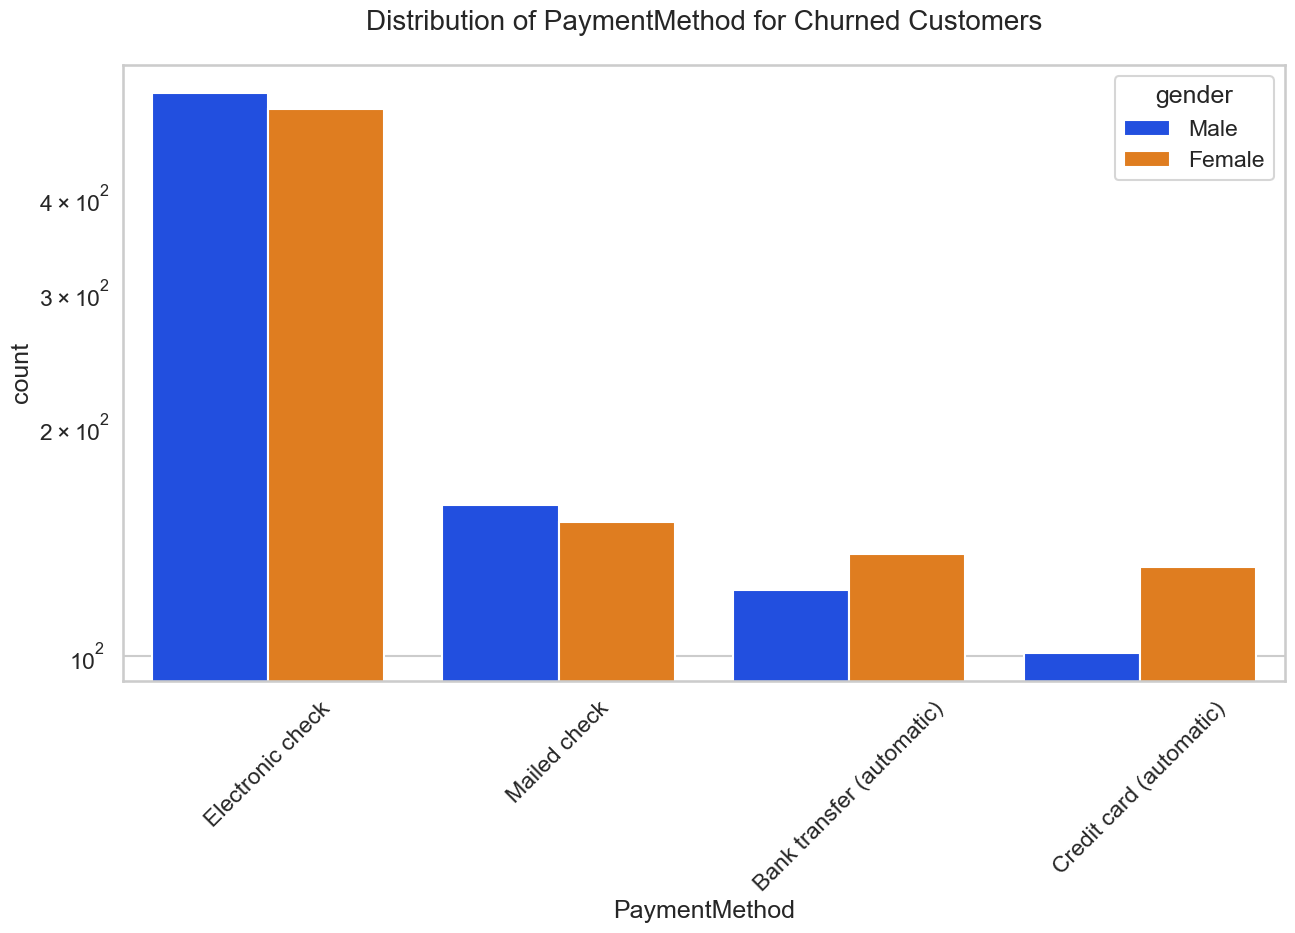

In [33]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

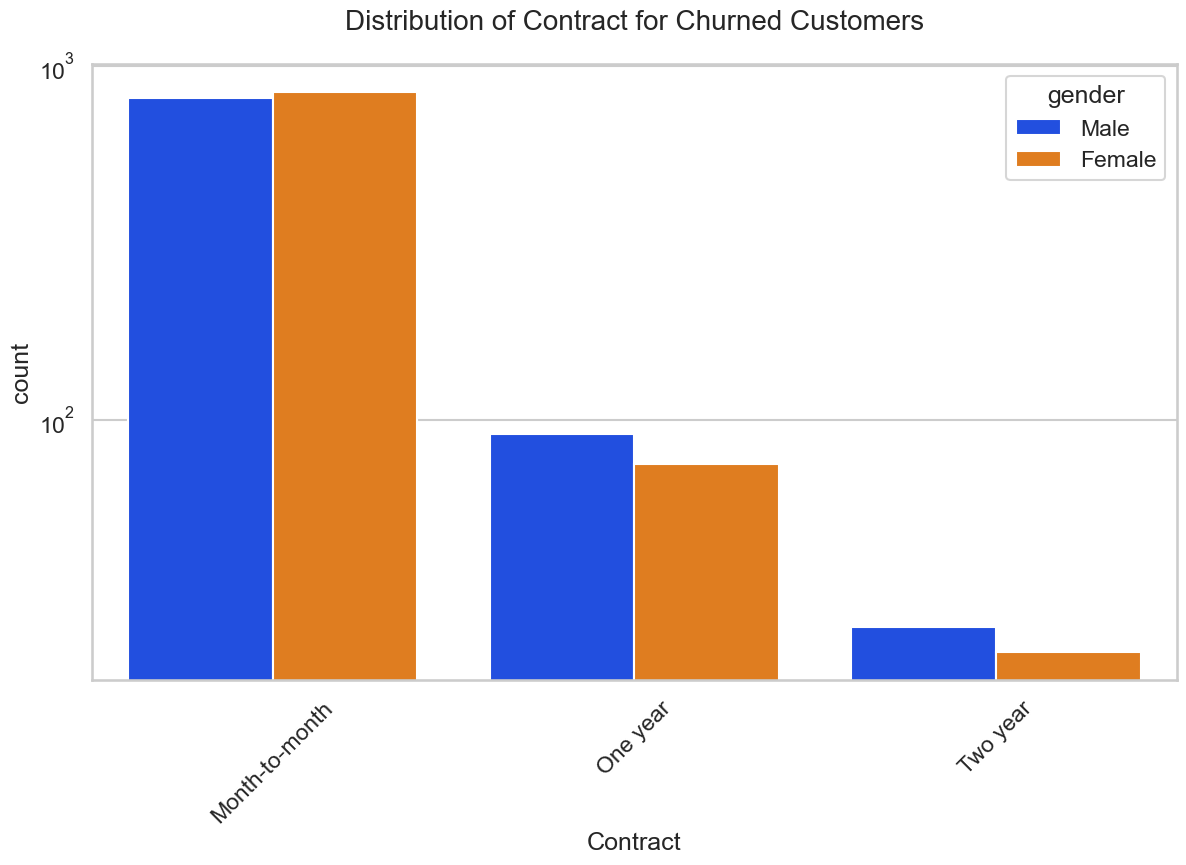

In [34]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

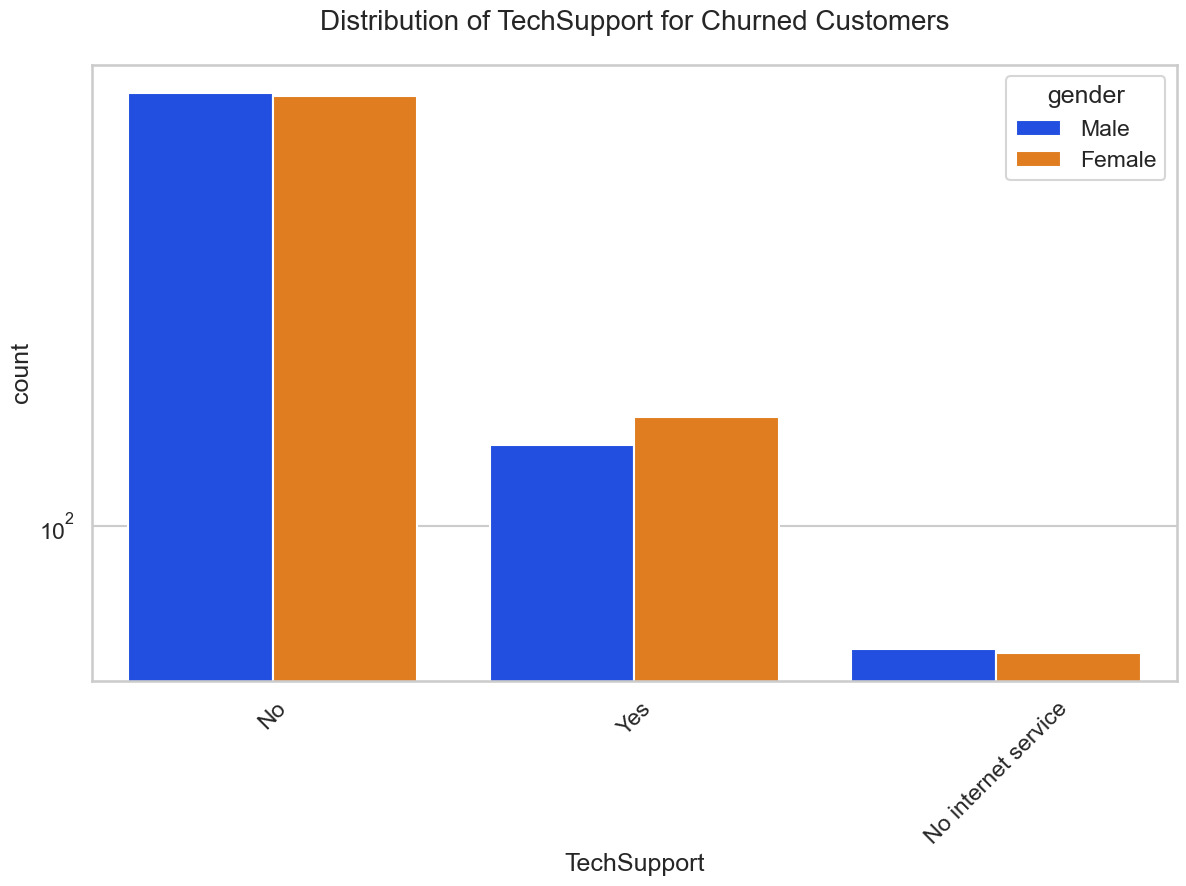

In [35]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

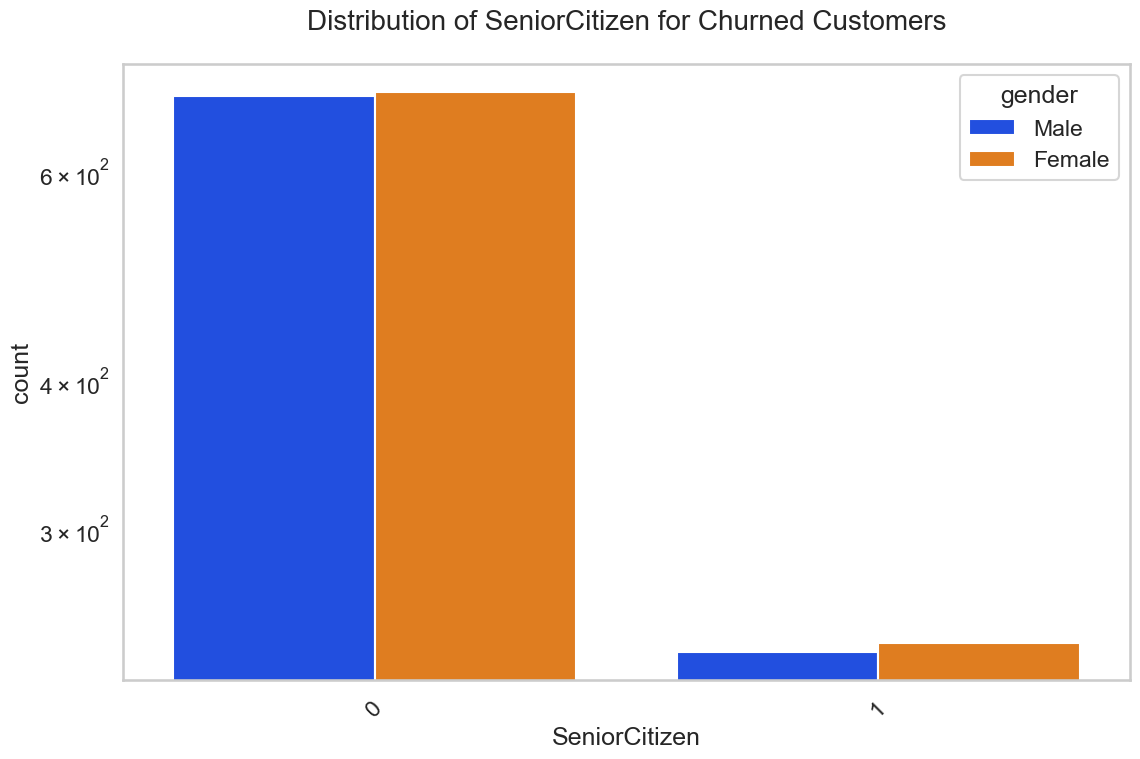

In [36]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# so we will build a model using the insights we get from this data which we are going to store in another excel i.e churn

so we found that
1. PaymentMethod -Electronic check 
2. Contract Type -monthly.
3. OnlineSecurity -No Online security, 
4. TechSupport -No Tech Support 
5. SeniorCitizen -Non senior Citizens 

this are the categories who is highest churners


In [37]:
df1_dummies.to_csv('churn.csv')

### Importing Libraries

In [38]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

#### Reading csv

In [39]:
df2=pd.read_csv("churn.csv")
df2.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [40]:
df2=df2.drop('Unnamed: 0',axis=1)

In [41]:
x=df2.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [42]:
y=df2['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred_logreg = lr.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
LR=accuracy_score(y_test, y_pred_logreg)
LR

0.798862828713575

In [50]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [51]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[951, 107],
       [176, 173]], dtype=int64)

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [53]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[951 107]
 [176 173]]
Accuracy: [0.79886283]
Sensitivity : [0.84383319]
Specificity : [0.61785714]
Precision: [0.89886578]
Recall: [0.84383319]
F-score: [0.87048055]
AUC: 0.697283895114857
ROC curve:


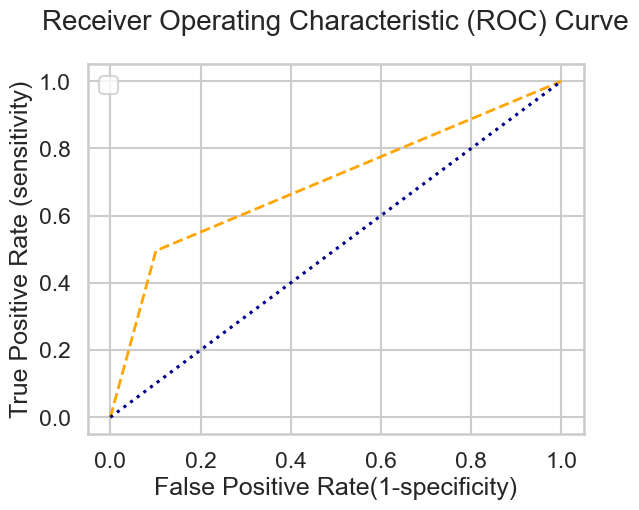

In [54]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine

In [55]:
x_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
2772,0,20.00,185.40,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5417,0,75.20,3901.25,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6807,0,71.10,213.35,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5654,0,95.25,3314.15,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1898,0,92.00,266.80,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [56]:
y_train.head()

2772    0
5417    0
6807    0
5654    0
1898    0
Name: Churn, dtype: int64

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()

In [59]:
svc.fit(x_train, y_train)

SVC()

In [60]:
y_pred_svc = svc.predict(x_test)

In [61]:
SVM=accuracy_score(y_test, y_pred_svc)
SVM

0.751954513148543

In [62]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[1058,    0],
       [ 349,    0]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1058    0]
 [ 349    0]]
Accuracy: [0.75195451]
Sensitivity : [0.75195451]
Specificity : [nan]
Precision: [1.]
Recall: [0.75195451]
F-score: [0.85841785]
AUC: 0.5
ROC curve:


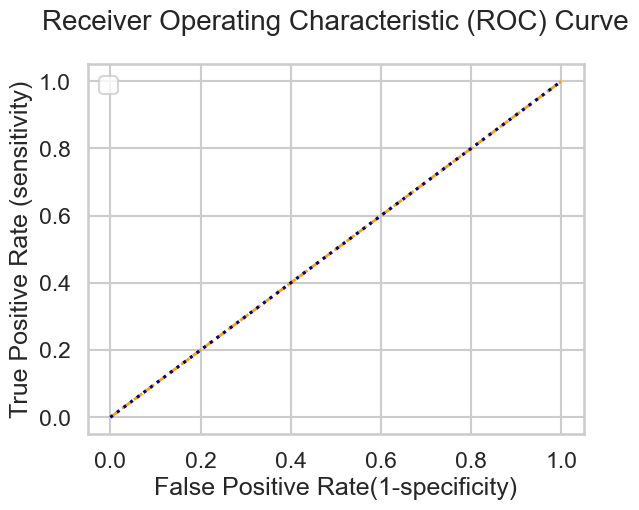

In [63]:
get_summary(y_test, y_pred_svc)

# Naive bayes Classification

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
gnb = GaussianNB()

In [66]:
gnb.fit(x_train, y_train)

GaussianNB()

In [67]:
y_pred_gnb = gnb.predict(x_test)

In [68]:
NB=accuracy_score(y_test,y_pred_gnb)
NB

0.6936744847192609

In [69]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[683, 375],
       [ 56, 293]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[683 375]
 [ 56 293]]
Accuracy: [0.69367448]
Sensitivity : [0.92422192]
Specificity : [0.43862275]
Precision: [0.64555766]
Recall: [0.92422192]
F-score: [0.76015582]
AUC: 0.7425496016162841
ROC curve:


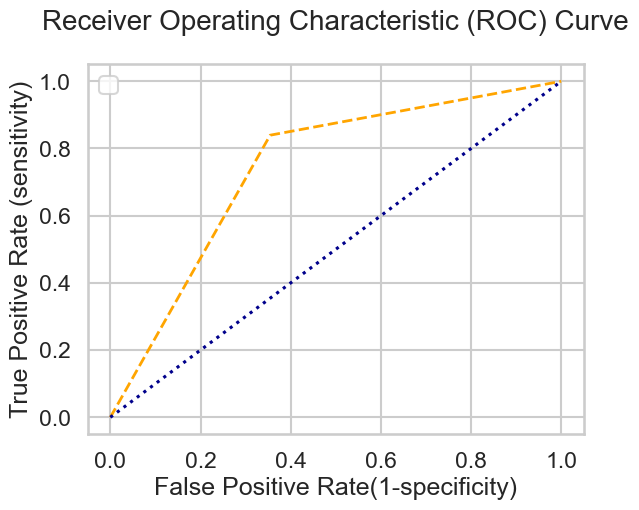

In [70]:
get_summary(y_test, y_pred_gnb)

# K - Nearest Neighbour

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
y_pred_knn = knn.predict(x_test)

In [75]:
KNN=accuracy_score(y_test, y_pred_knn)
KNN

0.775408670931059

In [76]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[926, 132],
       [184, 165]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[926 132]
 [184 165]]
Accuracy: [0.77540867]
Sensitivity : [0.83423423]
Specificity : [0.55555556]
Precision: [0.87523629]
Recall: [0.83423423]
F-score: [0.85424354]
AUC: 0.6740078322617686
ROC curve:


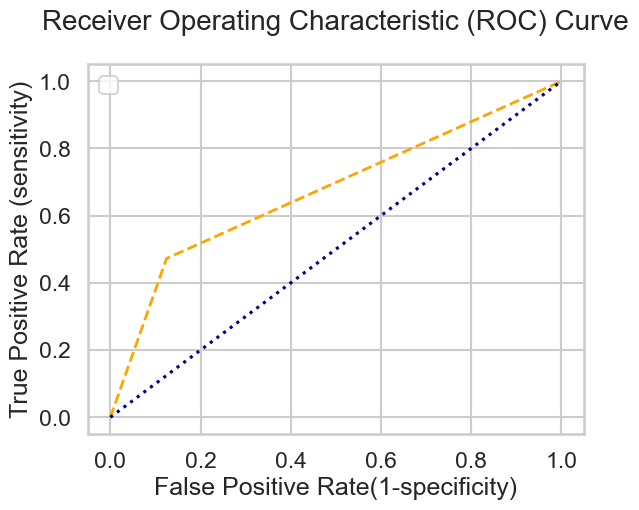

In [77]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree = DecisionTreeClassifier()

In [80]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
y_pred_dtree = dtree.predict(x_test)

In [82]:
DT=accuracy_score(y_test, y_pred_dtree)
DT

0.7135749822316987

In [83]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[838, 220],
       [183, 166]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[838 220]
 [183 166]]
Accuracy: [0.71357498]
Sensitivity : [0.82076396]
Specificity : [0.43005181]
Precision: [0.79206049]
Recall: [0.82076396]
F-score: [0.80615681]
AUC: 0.6338525953168924
ROC curve:


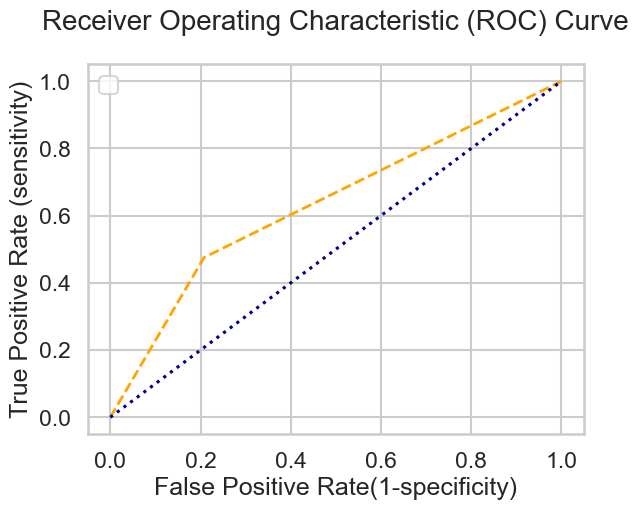

In [84]:
get_summary(y_test, y_pred_dtree)

#  Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier()

In [87]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [88]:
y_pred_rfc = rfc.predict(x_test)

In [89]:
RF=accuracy_score(y_test, y_pred_rfc)
RF

0.7889125799573561

In [90]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[940, 118],
       [179, 170]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[940 118]
 [179 170]]
Accuracy: [0.78891258]
Sensitivity : [0.84003575]
Specificity : [0.59027778]
Precision: [0.88846881]
Recall: [0.84003575]
F-score: [0.86357373]
AUC: 0.6877874131328505
ROC curve:


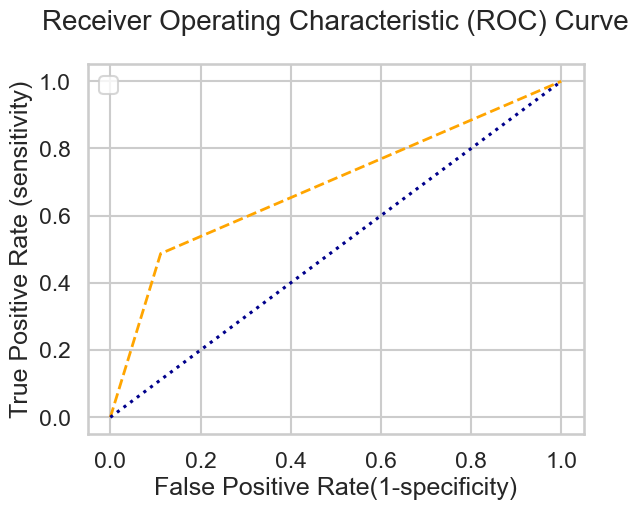

In [91]:
get_summary(y_test, y_pred_rfc)

In [92]:
from sklearn import model_selection

LR: 0.801479 (0.009105)
SVM: 0.734215 (0.012067)
NB: 0.702075 (0.012983)
KNN: 0.760665 (0.009373)
DT: 0.725256 (0.016661)
RF: 0.786542 (0.016259)


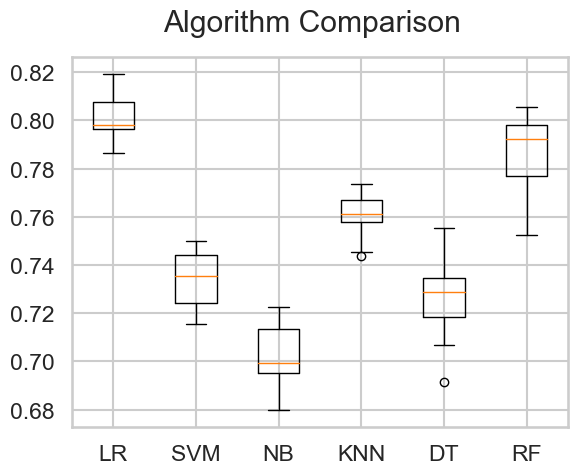

In [93]:
from sklearn import model_selection
# prepare models
seed=7
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy and also provides a box and whisker plot showing the spread ofthe accuracy scores across each cross validation fold for each algorithm.

# Conclusion

With LR Classifier, also we are able to get quite good results, infact better than Decision Tree so we will proceed with LR classifier